#Задание по практике 2

# Тетрадка с картинками
# https://colab.research.google.com/drive/1_X-osaQpoUFDz6THRtcYfEChPlIyRdIg?usp=sharing

In [354]:
!pip install pandas
!pip install plotly

In [355]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

##Введение в описательную статистику

1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

p.s если у вас нет категориальных признаков - преобразуйте любой числовой в категориальный (https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Важно **не** использовать преобразованный Y вместе с этим же X (то есть, если вы преобразовали возраст в категорию, то вы не моежет использовать возраст в качестве X и возраст категорию в качестве Y)

In [356]:
# чтение файла
df = pd.read_csv("ca_offenses_by_city.csv")

In [357]:
# чиним датасет

df = df.drop(['Rape (legacy definition)'], axis=1)
for col in df.columns:
  if col == 'City':
    continue
  df[col] = df[col].astype(str).str.replace(',','')
for col in df.columns:
  if col == 'City':
    df[col].astype("category")
    continue
  df[col] = df[col].astype('Float64')#Вывести типы колонок тут


In [358]:
df

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Adelanto,33005.0,212.0,2.0,14.0,48.0,148.0,808.0,434.0,254.0,120.0,24.0
1,Agoura Hills,20970.0,15.0,0.0,1.0,6.0,8.0,310.0,82.0,217.0,11.0,0.0
2,Alameda,78613.0,148.0,2.0,7.0,61.0,78.0,1819.0,228.0,1245.0,346.0,18.0
3,Albany,19723.0,34.0,1.0,6.0,16.0,11.0,605.0,95.0,447.0,63.0,0.0
4,Alhambra3,86175.0,168.0,1.0,13.0,74.0,80.0,1929.0,305.0,1413.0,211.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
455,Yountville3,3030.0,7.0,0.0,0.0,0.0,7.0,46.0,7.0,36.0,3.0,0.0
456,Yreka,7507.0,47.0,1.0,4.0,4.0,38.0,309.0,85.0,188.0,36.0,1.0
457,Yuba City,65974.0,216.0,0.0,28.0,66.0,122.0,1792.0,429.0,1160.0,203.0,14.0
458,Yucaipa,53498.0,94.0,2.0,8.0,22.0,62.0,1309.0,263.0,838.0,208.0,12.0


In [359]:
df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
count,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0
mean,70276.995652,298.580435,3.165217,23.202174,101.995652,170.217391,1918.213043,352.671739,1252.043478,313.497826,13.267391
std,212764.653234,1327.284267,14.971101,110.957275,495.037487,721.286288,5733.815467,964.779126,3831.857671,1018.75822,60.293764
min,115.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0
25%,12179.5,29.0,0.0,2.0,5.0,18.0,276.0,54.75,170.75,24.75,1.0
50%,32800.0,85.0,1.0,7.0,22.0,49.5,742.0,152.5,488.0,89.0,4.0
75%,74740.75,212.25,2.0,18.0,70.0,128.0,1887.25,342.5,1243.25,287.5,10.0
max,3962726.0,25156.0,282.0,2209.0,8952.0,13713.0,93503.0,16160.0,61191.0,16152.0,1131.0


In [360]:
df['Population'].describe()

count            460.0
mean      70276.995652
std      212764.653234
min              115.0
25%            12179.5
50%            32800.0
75%           74740.75
max          3962726.0
Name: Population, dtype: Float64

In [361]:
# я не придумал, как сделать категориальную переменную (но я бы хотел попробовать cut, просто не лезет сюда оно)
#df['CityFirstLetter'] = df['City'].apply(lambda x : x[0])
# А потом придумал
#df['Population'] = pd.cut(df['Population'], 4, labels=["Raw","Rare",'Medium', 'Well Done'])
# что qcut - будет лучше, т.к. все данные не попадут в raw
df['Population'] = pd.qcut(df['Population'], 4, labels=["Raw","Rare",'Medium', 'Well Done'])

df

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Adelanto,Medium,212.0,2.0,14.0,48.0,148.0,808.0,434.0,254.0,120.0,24.0
1,Agoura Hills,Rare,15.0,0.0,1.0,6.0,8.0,310.0,82.0,217.0,11.0,0.0
2,Alameda,Well Done,148.0,2.0,7.0,61.0,78.0,1819.0,228.0,1245.0,346.0,18.0
3,Albany,Rare,34.0,1.0,6.0,16.0,11.0,605.0,95.0,447.0,63.0,0.0
4,Alhambra3,Well Done,168.0,1.0,13.0,74.0,80.0,1929.0,305.0,1413.0,211.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
455,Yountville3,Raw,7.0,0.0,0.0,0.0,7.0,46.0,7.0,36.0,3.0,0.0
456,Yreka,Raw,47.0,1.0,4.0,4.0,38.0,309.0,85.0,188.0,36.0,1.0
457,Yuba City,Medium,216.0,0.0,28.0,66.0,122.0,1792.0,429.0,1160.0,203.0,14.0
458,Yucaipa,Medium,94.0,2.0,8.0,22.0,62.0,1309.0,263.0,838.0,208.0,12.0


In [362]:
df.head(10)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Adelanto,Medium,212.0,2.0,14.0,48.0,148.0,808.0,434.0,254.0,120.0,24.0
1,Agoura Hills,Rare,15.0,0.0,1.0,6.0,8.0,310.0,82.0,217.0,11.0,0.0
2,Alameda,Well Done,148.0,2.0,7.0,61.0,78.0,1819.0,228.0,1245.0,346.0,18.0
3,Albany,Rare,34.0,1.0,6.0,16.0,11.0,605.0,95.0,447.0,63.0,0.0
4,Alhambra3,Well Done,168.0,1.0,13.0,74.0,80.0,1929.0,305.0,1413.0,211.0,6.0
5,Aliso Viejo,Medium,32.0,0.0,5.0,3.0,24.0,363.0,53.0,276.0,34.0,1.0
6,Alturas3,Raw,35.0,0.0,13.0,2.0,20.0,61.0,9.0,48.0,4.0,4.0
7,American Canyon3,Rare,58.0,1.0,7.0,21.0,29.0,634.0,97.0,493.0,44.0,2.0
8,Anaheim3,Well Done,1271.0,18.0,129.0,439.0,685.0,10038.0,1476.0,6893.0,1669.0,28.0
9,Anderson,Raw,88.0,0.0,4.0,9.0,75.0,474.0,60.0,358.0,56.0,2.0


Категориальная переменная - Y

Переменная для анализа - Violent crime

In [363]:
df['Violent crime'].describe(include='all')

count          460.0
mean      298.580435
std      1327.284267
min              0.0
25%             29.0
50%             85.0
75%           212.25
max          25156.0
Name: Violent crime, dtype: Float64

In [364]:
mean = df.groupby('Population')['Violent crime'].mean()
mean

Population
Raw           21.530435
Rare          74.547826
Medium       148.078261
Well Done    950.165217
Name: Violent crime, dtype: Float64

In [365]:
median = df.groupby('Population')['Violent crime'].median()
median

Population
Raw           13.0
Rare          61.0
Medium       117.0
Well Done    374.0
Name: Violent crime, dtype: Float64

In [366]:
mode = df.groupby('Population')['Violent crime'].agg(pd.Series.mode)
mode

Population
Raw                                         1.0
Rare         [5.0, 7.0, 15.0, 31.0, 61.0, 85.0]
Medium                                     68.0
Well Done           [86.0, 172.0, 239.0, 400.0]
Name: Violent crime, dtype: object

In [367]:
min = df.groupby('Population')['Violent crime'].min()# (минимум) ваш код здесь
min

Population
Raw           0.0
Rare          4.0
Medium       16.0
Well Done    27.0
Name: Violent crime, dtype: Float64

In [368]:
max = df.groupby('Population')['Violent crime'].max()# (максимум) ваш код здесь
max

Population
Raw            153.0
Rare           283.0
Medium         499.0
Well Done    25156.0
Name: Violent crime, dtype: Float64

In [369]:
std = df.groupby('Population')['Violent crime'].std()# (стандартное отклонение) Ваш код здесь
std

Population
Raw            24.032990
Rare           56.825872
Medium        102.822121
Well Done    2549.415148
Name: Violent crime, dtype: float64

Вычислите следующие квантили: 25%, 50% (медиана), 75% для числового признака вашего датасета. Затем найдите интерквартильный размах.

In [370]:
q1 = df.groupby('Population')['Violent crime'].quantile(0.25)# (25% квантиль) ваш код здесь
q1

Population
Raw            5.5
Rare          31.0
Medium        68.0
Well Done    212.5
Name: Violent crime, dtype: float64

In [371]:
q2 = df.groupby('Population')['Violent crime'].quantile(0.50)# (50% квантиль) ваш код здесь
q2

Population
Raw           13.0
Rare          61.0
Medium       117.0
Well Done    374.0
Name: Violent crime, dtype: float64

In [372]:
q3 = df.groupby('Population')['Violent crime'].quantile(0.75)# (75% квантиль) ваш код здесь
q3

Population
Raw           31.5
Rare          99.0
Medium       204.5
Well Done    672.5
Name: Violent crime, dtype: float64

In [373]:
iqr = q3 - q1 # (интерквартильный размах) ваш код здесь
iqr

Population
Raw           26.0
Rare          68.0
Medium       136.5
Well Done    460.0
Name: Violent crime, dtype: float64

In [374]:
df.groupby('Population')['Violent crime'].describe()


,count,mean,std,min,25%,50%,75%,max
Population,,,,,,,,
Raw,115.0,21.530435,24.03299,0.0,5.5,13.0,31.5,153.0
Rare,115.0,74.547826,56.825872,4.0,31.0,61.0,99.0,283.0
Medium,115.0,148.078261,102.822121,16.0,68.0,117.0,204.5,499.0
Well Done,115.0,950.165217,2549.415148,27.0,212.5,374.0,672.5,25156.0


Какие выводы можно сделать исходя из полученных статистических данных?

**Ответ здесь**

```
Датасет - веллдан
cut ужастно работает с выбросами
Поэтому можно посмотреть qcut. Правда сложно сказать, насколько правильно анализировать такие данные, ведь они "причесаны" слишком сильно
Точнее они все равны по количеству, что ломает их анализ

Можно заметить, что в WellDone городах так же имеется низкая преступность.
Так же WellDone содержит в себе все выбросы (из-за qcut)
Довольно большой std для всех категорий

Много данных имеют выбросы, котоые мешают сделать их категориальными
(что логично, т.к все данные не очень похожи на категориальные)
```


##Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

In [375]:
fig = px.histogram(df, y='Population', x='Violent crime', barmode='group', text_auto=True, color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.update_yaxes(categoryorder='total ascending')

In [376]:
#это просто для прикола. Красивое
fig = px.histogram(df, y='Population', x='Violent crime', color='City', text_auto=True, color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.update_yaxes(categoryorder='total ascending')

In [377]:
#это просто для прикола. Красивое
fig = px.histogram(df, y='Population', x='Violent crime', color='City', barmode='group', text_auto=True, color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.update_yaxes(categoryorder='total ascending')

Постройте boxplot любого признака из своего датасета.

1) boxplot числовой переменной;

2) boxplot числовой переменной относительно категориальный переменной;

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

In [378]:
"""

Ваш код здесь

"""
fig = px.box(df[df['Population'].isin(['Medium'])],y='Arson')
fig.show()

In [379]:
"""

Ваш код здесь

"""

fig = px.box(df[~df['Population'].isin(['Well Done'])], x='Population', y='Violent crime')
fig.update_xaxes(categoryorder='total ascending')

Постройте диаграмму рассеивания для числовых признаков вашего датасета.

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

In [380]:
"""

Ваш код здесь

"""

fig = px.scatter(df[~df['Population'].isin(['Well Done'])], x = 'Violent crime', y= 'Arson')
fig.show()

Постройте матрицу корреляции для двух числовых признаков вашего датасета.

In [381]:
fig = px.imshow(df.corr(), text_auto=True)
fig.show()

<ipython-input-381-03ed87cd5e87>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [382]:
corr_matrix = df.corr()
corr_matrix #ваш код здесь
#вывод здесь

<ipython-input-382-13e7d062047c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
Violent crime,1.000000,0.981768,0.975033,0.984498,0.994107,0.955451,0.956114,0.936872,0.948194,0.948917
Murder and nonnegligent manslaughter,0.981768,1.000000,0.947388,0.969541,0.974696,0.916854,0.933636,0.889889,0.928964,0.933018
Rape (revised definition),0.975033,0.947388,1.000000,0.941240,0.974725,0.916252,0.924957,0.896159,0.910216,0.933178
Robbery,0.984498,0.969541,0.941240,1.000000,0.960394,0.962208,0.935264,0.950905,0.953188,0.930809
Aggravated assault,0.994107,0.974696,0.974725,0.960394,1.000000,0.937817,0.955843,0.915038,0.931330,0.944404
Property crime,0.955451,0.916854,0.916252,0.962208,0.937817,1.000000,0.968786,0.994479,0.970247,0.918435
Burglary,0.956114,0.933636,0.924957,0.935264,0.955843,0.968786,1.000000,0.942065,0.962156,0.933636
Larceny-theft,0.936872,0.889889,0.896159,0.950905,0.915038,0.994479,0.942065,1.000000,0.943717,0.902996
Motor vehicle theft,0.948194,0.928964,0.910216,0.953188,0.931330,0.970247,0.962156,0.943717,1.000000,0.888564
Arson,0.948917,0.933018,0.933178,0.930809,0.944404,0.918435,0.933636,0.902996,0.888564,1.000000


Какие выводы можно сделать на основе графиков и матрицы корреляции?

**Ответ здесь**
```
В данном датасете уровень корреляции близок к 90% => многие переменные можно связать между собой
```

##Задание для гениев*

Реализовать следующие методы поиска выбросов:
1. На основе среднего и отклонения
2. Критерий Шовене
3. С помощью квартилей
4. Поиск выбросов по двум переменным

[Посмотреть](http://course.omgtu.ru/wp-content/uploads/2021/04/3_%D0%92%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D1%8B.pdf)

P.S. в качестве возвразаемого значения методов может быть:
1. очищенный датафрейм
2. индексы выбросов ```df.series.index```

In [383]:
"""

Ваш код здесь

"""

'\n\nВаш код здесь\n\n'

In [405]:
# На основе среднего и отклонения
# Это иттератинвная функция или нет?
## Мы можем за один проход выкинуть все
## или нужно после каждкого выкида по новой запускать
## Нужно ли пересчитывать выборку для определения её симметричности
def BibaBoba(df, col):
  import numpy as np

  enemyList = []

  for i in range(df[col].shape[0]):
    arr = list(df[col])
    n = len(arr)
    mean = np.array(arr).mean()
    median = np.array(arr).mean()
    std = np.array(arr).std()

    closeL = abs(median-mean)
    closeR = 3*((std*std/n)**0.5)

    cof = 3 if closeL<=closeR else 5

    x = arr.pop(i)
    mean = np.array(arr).mean()
    std = np.array(arr).std()

    lmin = mean-(cof*std)
    lmax = mean+(cof*std)
#    print(lmin, lmax)

    if (x > lmax) | (x < lmin):
      enemyList.append(i)

  ans = df[~df.index.isin(enemyList)]
  return ans


In [386]:
#Критерий Шовене
def chevrole(df, col):
  import math
  import numpy as np

  lis = list(df[col])
  index = list(df.index)

  boom = True

  while boom:
    boom = False
    right = 1/(2*len(lis))
    mean = np.array(lis).mean()
    std = np.array(lis).std()
    for i in range(len(lis)):
      x = abs(lis[i]-mean)/std
      if  math.erfc(x) < right:
        lis.pop(i)
        index.pop(i)
        boom = True
        break

  ans = df.iloc[index]
  return ans

In [404]:
# С помощью квартилей
def quart(df, col):
  Ni = 1.5
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1

  #print(q1,q3,iqr)

  lmax = q3 + Ni*iqr
  lmin = q1 - Ni*iqr

  ans =  df[~((df[col]< lmin) | (df[col]>lmax))]
  return ans




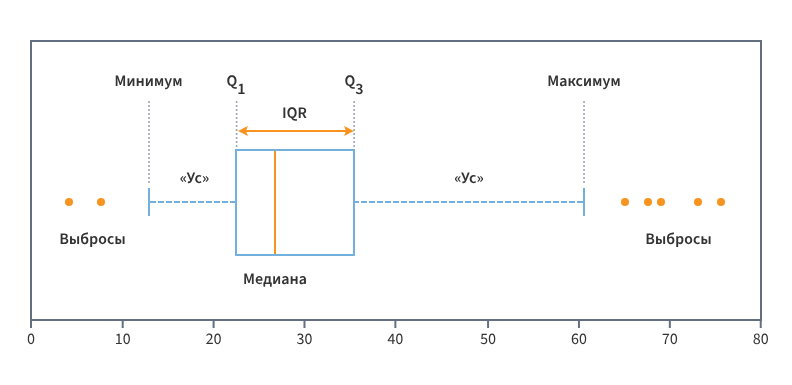

In [399]:
# Поиск выбросов по двум переменным
## Это просто пример того, что не сработает
## Как рассчитать расстояние от точек до точек - условно есть идея, но займет много времени
def SMB(df, col1, col2):
  mario = quart(df, col1)
  luigi = quart(df, col2)

  ans = pd.merge(mario, luigi, left_index=True, right_index=True)

  return ans




In [412]:
example = BibaBoba(df, 'Violent crime')

fig = px.box(df, x='Population', y='Violent crime', title="Default", height = 400)
fig.update_xaxes(categoryorder='total ascending')
fig.show()

fig = px.box(example, x='Population', y='Violent crime', title="Std+Mean", height = 400)
fig.update_xaxes(categoryorder='total ascending')
fig.show()

example = chevrole(df, 'Violent crime')

fig = px.box(example, x='Population', y='Violent crime', title='Chauvenet', height = 400)
fig.update_xaxes(categoryorder='total ascending')
fig.show()

example = quart(df, 'Violent crime')

fig = px.box(example, x='Population', y='Violent crime', title='Quantile', height = 400)
fig.update_xaxes(categoryorder='total ascending')
fig.show()

example = SMB(df, 'Violent crime', 'Robbery')

fig = px.box(example, x='Population_x', y='Violent crime_x', title='SMB', height = 400)
fig.update_xaxes(categoryorder='total ascending')
fig.show()

### Пример реализации одного метода

In [392]:
from statistics import median, mean

class Outline:
  def __init__(self, df):
    self.df = df

  def delete_outline_by_mean(self, column_name):
    mean_data = mean(self.df[column_name])
    maximum = mean_data * 2
    result = []

    for item in self.df[column_name]:
      if abs(item - mean_data) < maximum:
        result.append(item)

    return result



In [393]:
data = pd.DataFrame(
    data = {
        "col1": [1, 2, 3, 4, 5, 1000],
        "col2": [1, 2, 3, 2, 1, 4]
    }
)

so = Outline(data)
so.delete_outline_by_mean("col1")

[1, 2, 3, 4, 5]